In [29]:
import numpy as np
import pandas as pd
import jalali_pandas
from datetime import datetime,date
import seaborn as sns



In [30]:
dollor = pd.read_excel('/home/reza/Downloads/dollor.xlsx')


In [31]:
Mcap =  pd.read_excel('/home/reza/Downloads/marketcap.xlsx')

In [32]:
dollor.rename(columns = {'تاریخ':'DATE', 'دلار':'dollorRate'}, inplace = True)

In [33]:
dollor['DATE'] = dollor['DATE'].str.replace('-','/')


In [34]:
dollor["DATE"] =dollor["DATE"].jalali.parse_jalali("%Y/%m/%d")

In [35]:
dollor["DATE"] = dollor["DATE"].jalali.to_gregorian()

In [36]:
# dollor['DATE'] = pd.to_datetime(dollor['DATE']).dt.date
# dollor['DATE'] = pd.to_datetime(dollor['DATE'], format='%Y-%m-%d')


In [37]:
Mcap.drop(['ClosePrice', 'last Capital'], axis=1,inplace=True)

In [38]:
Mcap.rename(columns = {'market cap':'MarketCap'}, inplace = True)

In [39]:
Mcap.drop(Mcap.index[Mcap['MarketCap'] == '#VALUE!'], inplace=True)


In [40]:
Mcap.MarketCap = pd.to_numeric(Mcap.MarketCap)

In [41]:
Mcap['DateTimeEn'] = pd.to_datetime(Mcap['DateTimeEn']).dt.date

In [42]:
Mcap['DateTimeEn'] = pd.to_datetime(Mcap['DateTimeEn'], format='%Y-%m-%d')
Mcap = Mcap.query(" DateTimeEn >= '2009-03-01'" )


In [43]:
mean_dollor = dollor.groupby(pd.PeriodIndex(dollor['DATE'], freq="M"))['dollorRate'].mean().reset_index()

mean_dollor

,DATE,dollorRate
0,2009-03,9917.272727
1,2009-04,10028.333333
2,2009-05,9844.838710
3,2009-06,9871.333333
4,2009-07,10015.161290
...,...,...
166,2023-01,423048.148148
167,2023-02,485533.333333
168,2023-03,497931.818182
169,2023-04,518107.692308


In [44]:
Mcap

,Name,ShortName,DateTimeEn,MarketCap
90,کف‌,شکف,2009-03-31,312500000000
91,کف‌,شکف,2009-04-29,316000000000
92,کف‌,شکف,2009-05-30,294750000000
93,کف‌,شکف,2009-06-30,320250000000
94,کف‌,شکف,2009-07-26,276750000000
...,...,...,...,...
120247,نوش پونه مشهد,غپونه,2022-09-21,8321685680000
120248,مجتمع صنعتی آرتاویل تایر,پارتا,2022-06-29,37214110510000
120249,مجتمع صنعتی آرتاویل تایر,پارتا,2022-07-31,33775338273000
120250,مجتمع صنعتی آرتاویل تایر,پارتا,2022-08-31,31043163071000


In [45]:
# Mcap.to_excel("Mcapnew.xlsx")  

In [46]:
mean_dollor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   DATE        171 non-null    period[M]
 1   dollorRate  171 non-null    float64  
dtypes: float64(1), period[M](1)
memory usage: 2.8 KB


In [47]:
Mcap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77543 entries, 90 to 120251
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        77543 non-null  object        
 1   ShortName   77543 non-null  object        
 2   DateTimeEn  77543 non-null  datetime64[ns]
 3   MarketCap   77543 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.0+ MB


In [48]:
saham = Mcap[Mcap['ShortName'] == "فاسمین"]
saham

,Name,ShortName,DateTimeEn,MarketCap
75476,کالسیمین‌,فاسمین,2009-03-31,448695000000
75477,کالسیمین‌,فاسمین,2009-04-28,538200000000
75478,کالسیمین‌,فاسمین,2009-05-31,746460000000
75479,کالسیمین‌,فاسمین,2009-06-30,834015000000
75480,کالسیمین‌,فاسمین,2009-07-22,904410000000
...,...,...,...,...
75634,کالسیمین‌,فاسمین,2022-05-31,127260000000000
75635,کالسیمین‌,فاسمین,2022-06-29,126600000000000
75636,کالسیمین‌,فاسمین,2022-07-31,106620000000000
75637,کالسیمین‌,فاسمین,2022-08-31,110460000000000


In [49]:
dollorratedict = dict()

for index, row in mean_dollor.iterrows():
    dollorratedict[row["DATE"].strftime("%b %Y")] = int(row["dollorRate"])


In [50]:
Marketcapdict = dict()

for index, row in saham.iterrows():
    Marketcapdict[row["DateTimeEn"].strftime("%b %Y")] = int(row["MarketCap"])


In [51]:
marketcappric_bydollor = []

for x, y in Marketcapdict.items():
    
    if x in dollorratedict.keys():
        marketcappric_bydollor.append([int(y/dollorratedict.get(x)),x])
        

In [52]:
marketcappric_bydollor

[[45245033, 'Mar 2009'],
 [53669724, 'Apr 2009'],
 [75828931, 'May 2009'],
 [84491439, 'Jun 2009'],
 [90305541, 'Jul 2009'],
 [133003300, 'Aug 2009'],
 [133694668, 'Sep 2009'],
 [140159927, 'Oct 2009'],
 [136214099, 'Nov 2009'],
 [140651913, 'Dec 2009'],
 [161401372, 'Jan 2010'],
 [216600118, 'Feb 2010'],
 [247265438, 'Mar 2010'],
 [277814050, 'Apr 2010'],
 [270713871, 'May 2010'],
 [282416484, 'Jun 2010'],
 [306920168, 'Jul 2010'],
 [300133484, 'Aug 2010'],
 [332336996, 'Sep 2010'],
 [356326148, 'Oct 2010'],
 [327078189, 'Nov 2010'],
 [320363925, 'Dec 2010'],
 [348261013, 'Jan 2011'],
 [413070622, 'Feb 2011'],
 [483961538, 'Mar 2011'],
 [442693518, 'Apr 2011'],
 [385906444, 'May 2011'],
 [389393901, 'Jun 2011'],
 [449686867, 'Jul 2011'],
 [430528633, 'Aug 2011'],
 [381694386, 'Sep 2011'],
 [373102790, 'Oct 2011'],
 [333830886, 'Nov 2011'],
 [432927230, 'Dec 2011'],
 [364766383, 'Jan 2012'],
 [335612980, 'Feb 2012'],
 [367370223, 'Mar 2012'],
 [364947019, 'Apr 2012'],
 [305375069, 'May

In [53]:
Final = pd.DataFrame(marketcappric_bydollor, columns =['marketcappric_bydollor', 'DATE'])
Final["DATE"] = Final["DATE"].astype("datetime64[ns]")


Final

/tmp/ipykernel_15429/3702171796.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Final["DATE"] = Final["DATE"].astype("datetime64[ns]")


,marketcappric_bydollor,DATE
0,45245033,2009-03-01
1,53669724,2009-04-01
2,75828931,2009-05-01
3,84491439,2009-06-01
4,90305541,2009-07-01
...,...,...
158,426188881,2022-05-01
159,397483234,2022-06-01
160,334756671,2022-07-01
161,364983280,2022-08-01


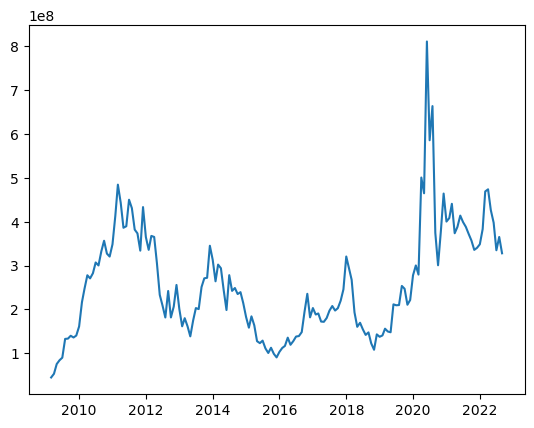

In [54]:
import matplotlib.pyplot as plt
plt.plot( Final.DATE,Final.marketcappric_bydollor)

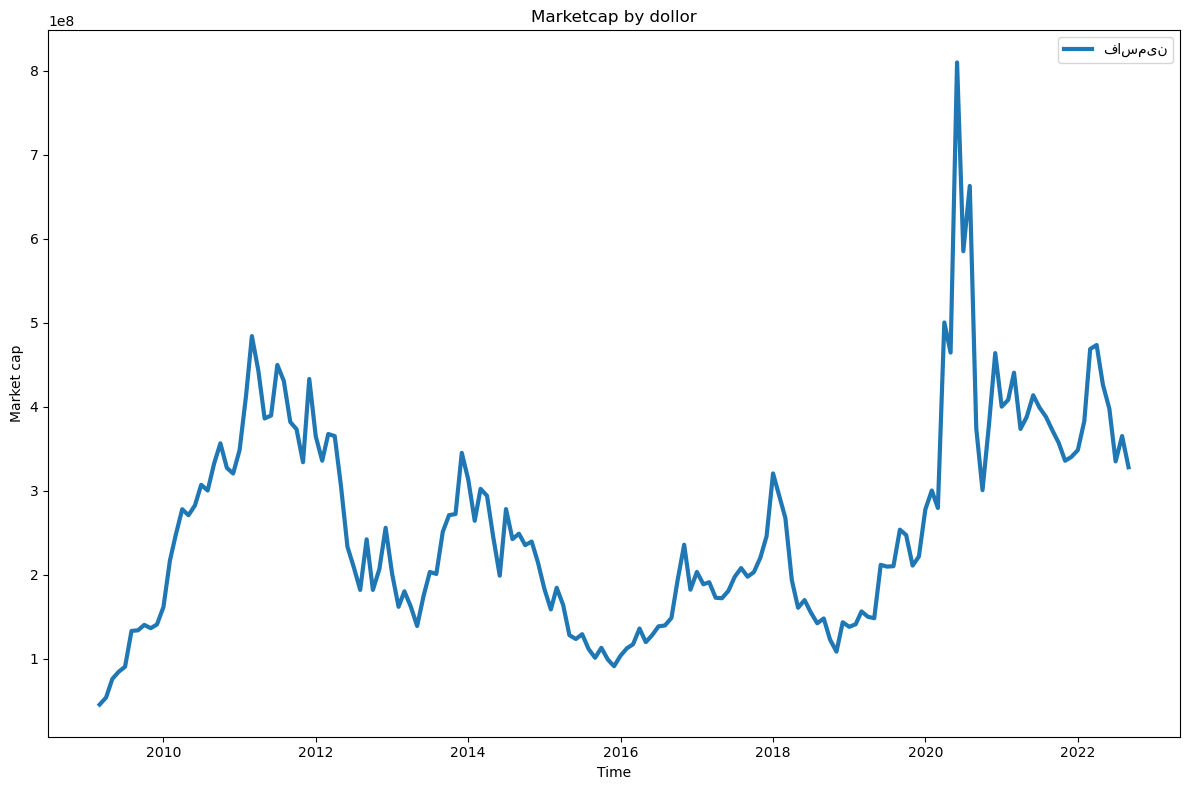

In [55]:
fig = plt.figure(figsize=(12, 8))
plt.plot(Final.DATE, Final.marketcappric_bydollor, label='فاسمین', 
         linewidth=3)

# Add title and labels

plt.title('Marketcap by dollor')
plt.xlabel('Time')
plt.ylabel('Market cap')

# Add legend

plt.legend()

# Auto space

plt.tight_layout()

# Display plot
